In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [26]:
data=pd.read_csv('/content/data_preprocses.csv')
data = data.drop(columns = ["Unnamed: 0"])
data

,brand,screen_size,screen_resolution,cpu,cpu_speed,ram,memory,gpu,gpu_description,OpSys,weight,color,price,ppi
0,acer,15.6,2073600,amd_3,4.1,8.0,128.0,amd,integrated,windows,3.92,silver,292.49,141.211998
1,acer,15.6,2073600,amd_5,4.3,8.0,1024.0,amd,integrated,windows,3.92,blue,669.99,141.211998
2,acer,15.6,2073600,intel_i7,3.0,32.0,2048.0,nvidia,dedicated,windows,5.51,black,1869.00,141.211998
3,acer,17.3,2073600,intel_i5,2.5,32.0,1024.0,nvidia,dedicated,windows,9.98,black,1159.00,127.335675
4,acer,14.0,2073600,intel_celeron,1.6,4.0,32.0,intel,integrated,windows,3.42,silver,293.00,157.350512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422,apple,13.0,4096000,intel_i5,3.1,8.0,512.0,intel,integrated,mac_os,3.02,grey,744.40,232.221074
2423,apple,15.0,4096000,apple,3.5,8.0,512.0,apple,integrated,mac_os,6.35,silver,1439.95,201.258264
2424,apple,13.0,4096000,intel_i5,2.4,8.0,512.0,intel,integrated,mac_os,3.00,grey,578.69,232.221074
2425,apple,11.6,1049088,intel_i5,2.7,4.0,128.0,intel,integrated,mac_os,1.10,silver,209.99,135.094211


In [27]:
#price EDA:
def plot_statistics(data: pd.Series, bins=40, title=None, discrete=False):
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    fig.set_figheight(5)
    fig.set_figwidth(7)
    ax_box.set_title(title)

    if not discrete:
        sns.boxplot(x=data, ax=ax_box, showmeans=True, meanprops={"marker": "o",
                                                                 "markerfacecolor": "white",
                                                                 "markeredgecolor": "black",
                                                                 "markersize": "10"})
        sns.histplot(data, ax=ax_hist, bins=bins, kde=True)

        mean_line = ax_hist.axvline(x=data.mean(), color='green', linestyle='dashed', linewidth=2, label='Mean')
        ax_hist.legend()

        ax_box.get_xaxis().set_visible(False)
        sns.despine(ax=ax_box, left=True)
        ax_box.set_xlabel('')
    else:
        sns.countplot(data.sort_values(), ax=ax_hist)

    sns.despine(ax=ax_hist)

count    2427.000000
mean      776.709374
std       550.925666
min        43.400000
25%       377.000000
50%       637.990000
75%      1038.455000
max      4955.950000
Name: price, dtype: float64


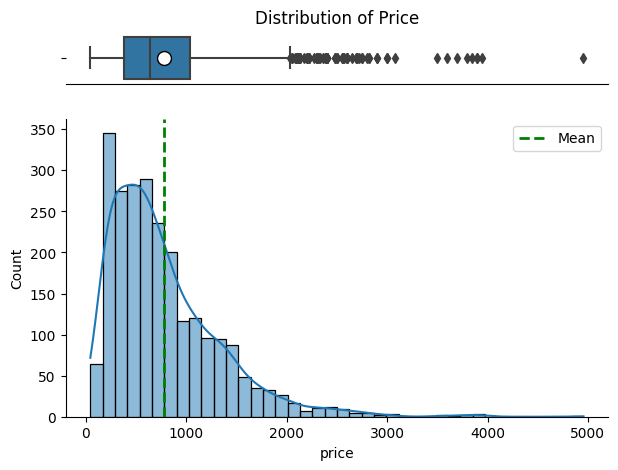

In [28]:
print(data['price'].describe())
plot_statistics(data['price'],title='Distribution of Price')

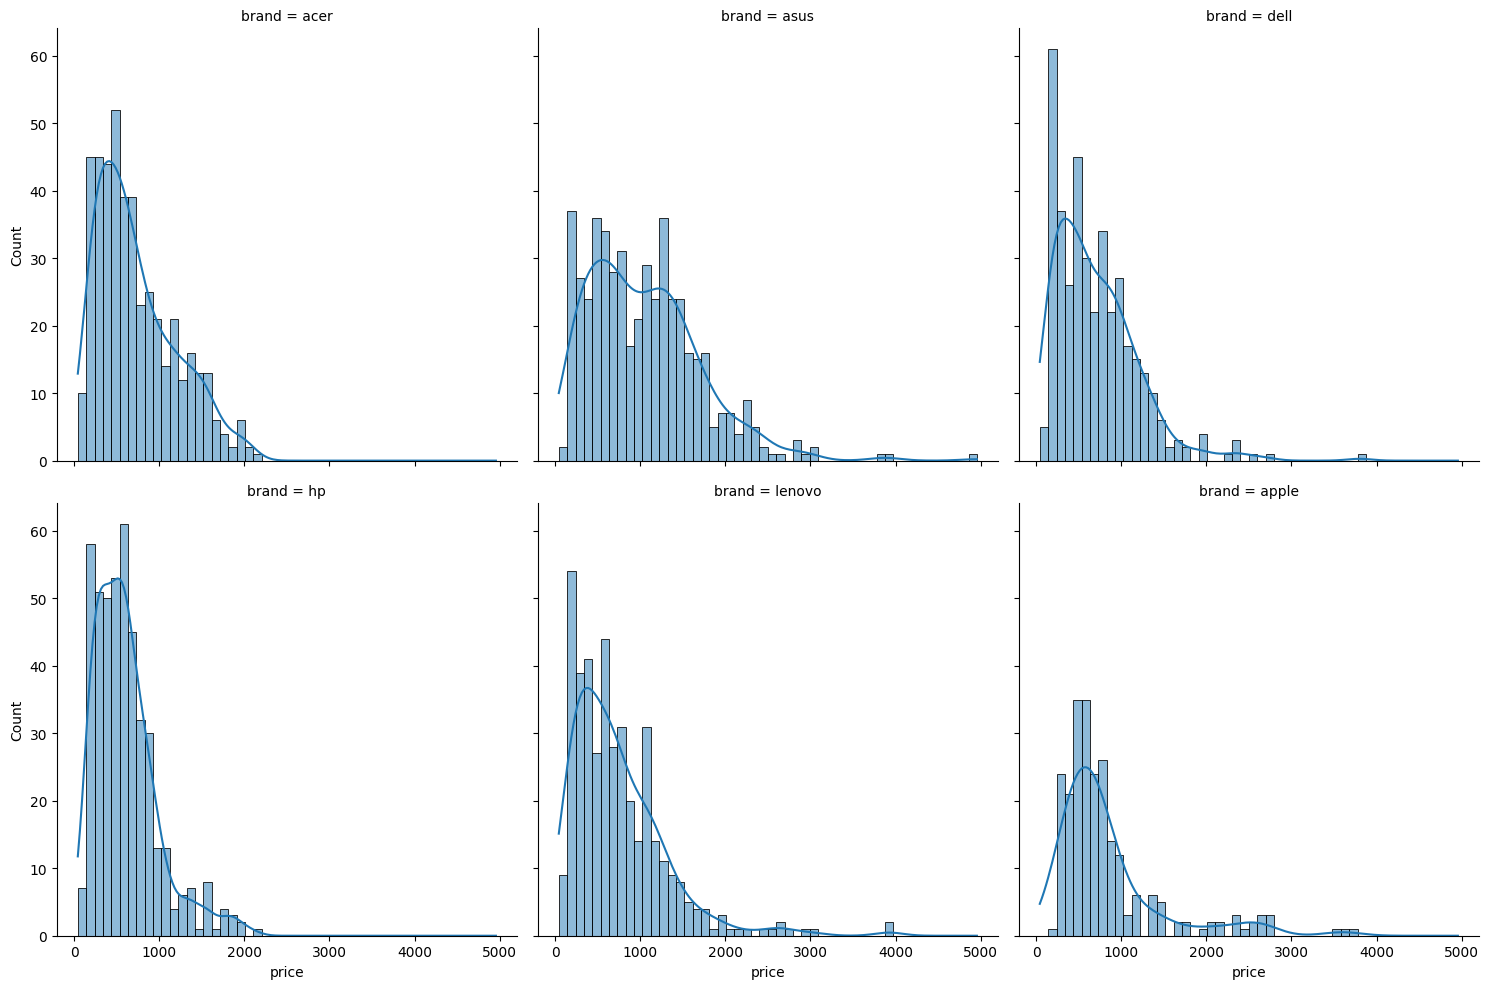

In [29]:
sns.displot(data=data, x="price", col="brand", kde=True,col_wrap=3)
plt.show()

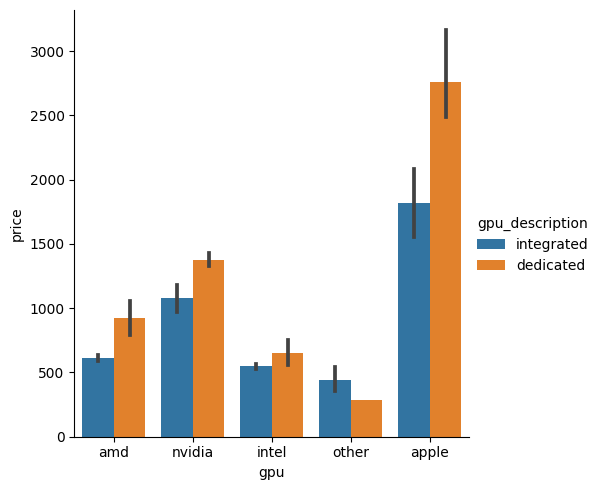

In [30]:
sns.catplot(data=data, kind="bar", x="gpu", y="price", hue="gpu_description")
plt.show()

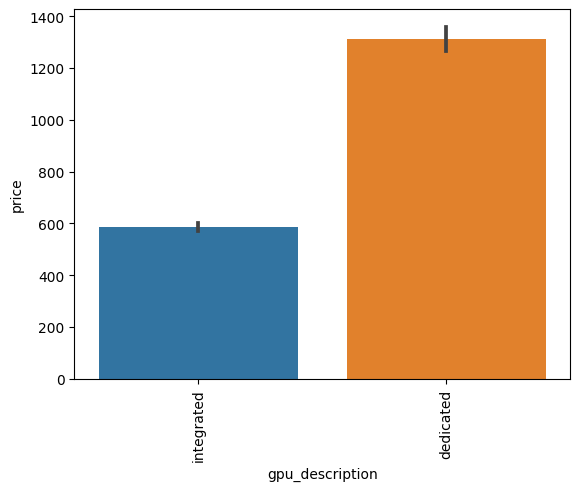

In [31]:
sns.barplot(x = data['gpu_description'], y = data['price'])
plt.xticks(rotation='vertical')
plt.show()

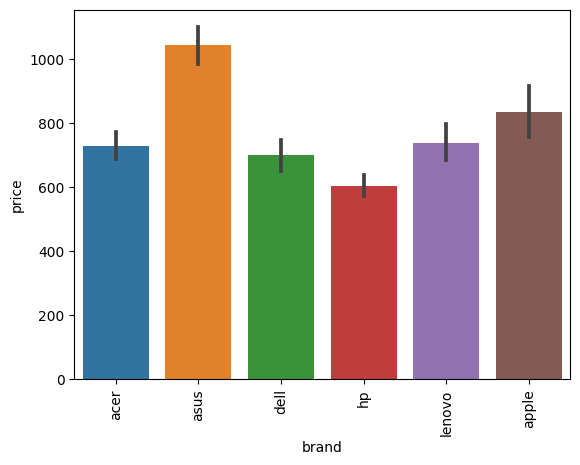

In [32]:
sns.barplot(x = data['brand'], y = data['price'])
plt.xticks(rotation='vertical')
plt.show()

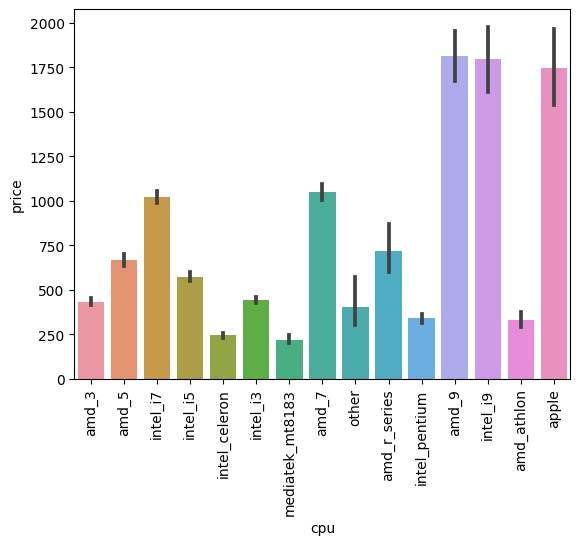

In [33]:
sns.barplot(x = data['cpu'], y = data['price'])
plt.xticks(rotation='vertical')
plt.show()

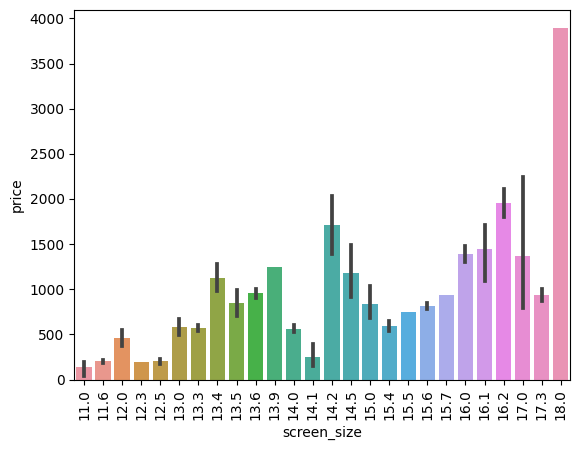

In [34]:
sns.barplot(x = data['screen_size'], y = data['price'])
plt.xticks(rotation='vertical')
plt.show()

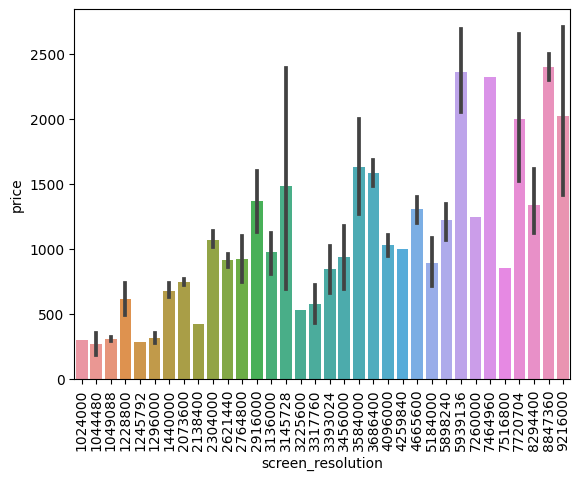

In [35]:
sns.barplot(x = data['screen_resolution'], y = data['price'])
plt.xticks(rotation='vertical')
plt.show()

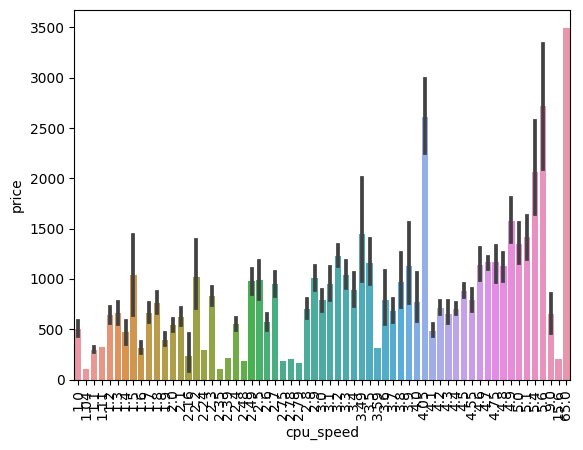

In [36]:
sns.barplot(x = data['cpu_speed'], y = data['price'])
plt.xticks(rotation='vertical')
plt.show()

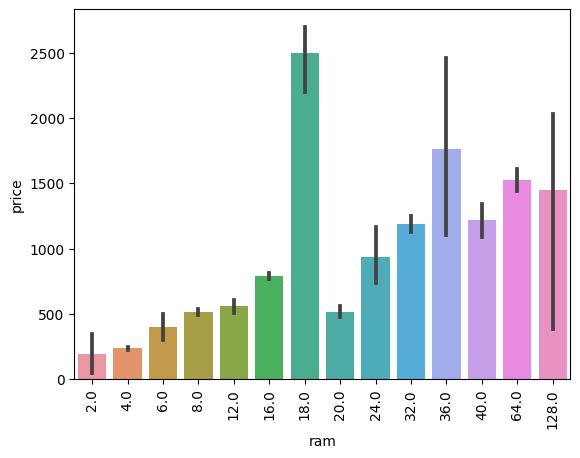

In [37]:
sns.barplot(x = data['ram'], y = data['price'])
plt.xticks(rotation='vertical')
plt.show()

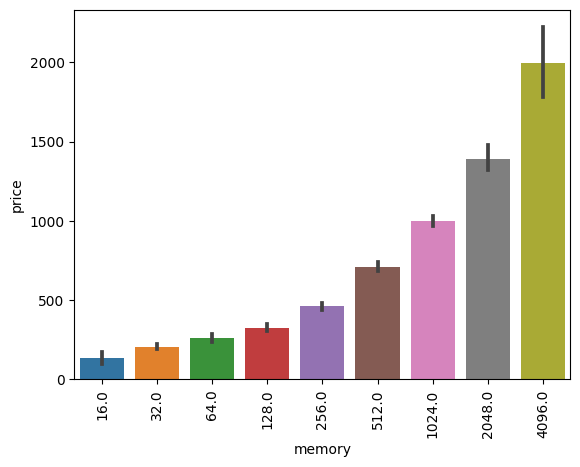

In [38]:
sns.barplot(x = data['memory'], y = data['price'])
plt.xticks(rotation='vertical')
plt.show()

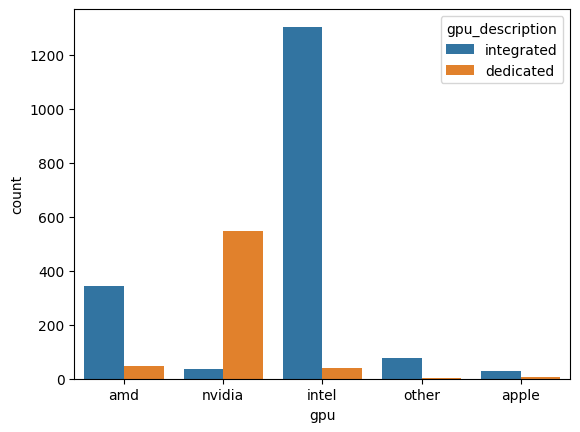

In [39]:
sns.countplot(data=data, x='gpu',hue='gpu_description')
plt.show()

In [40]:
# data.groupby('gpu').count('gpu_description')

In [41]:
def visualize_data(column):
  fig, axes = plt.subplots(1, 2,figsize=(15,5))
  sns.countplot(data=data, x=column,ax=axes[0])
  fig.suptitle("Visualize "+ column)
  axes[0].set_title("Number of records for each kind of "+column)
  axes[0].tick_params(labelrotation=90,axis='x')
  sns.barplot(data=data, y=column,x='price',ax=axes[1],orient='h')
  axes[1].set_title("Average price for each kind of "+column)
  plt.show()

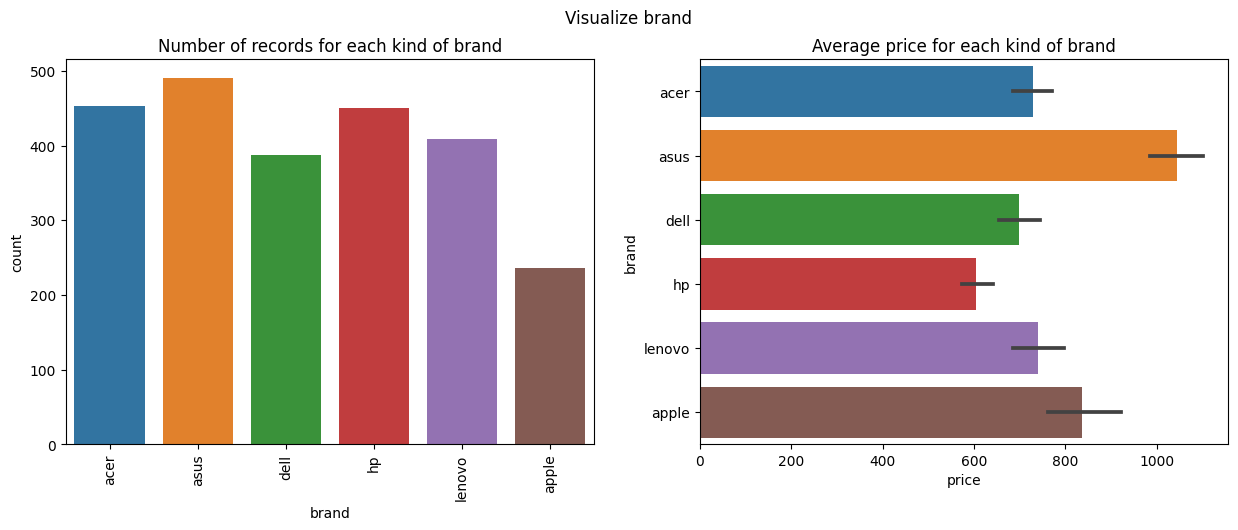

In [42]:
visualize_data('brand')

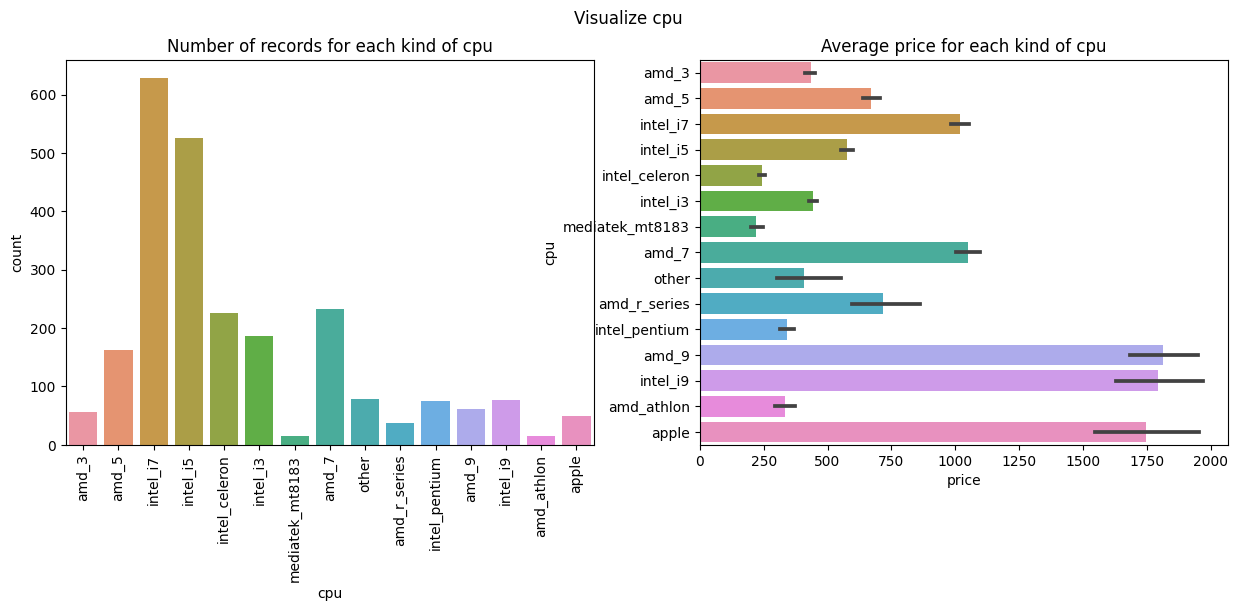

In [43]:
visualize_data('cpu')

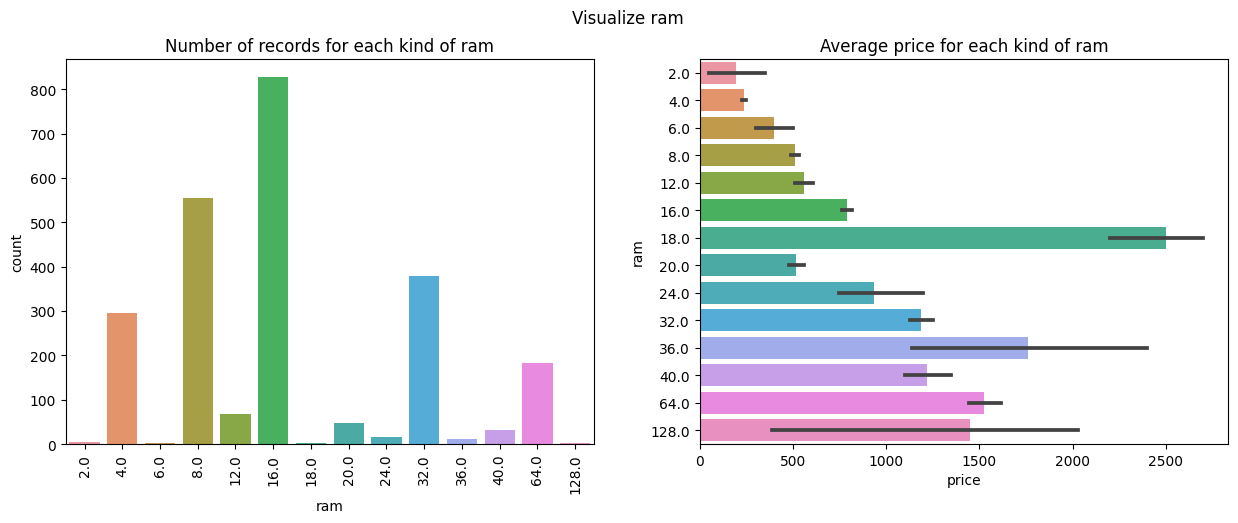

In [44]:
visualize_data('ram')

In [45]:
data.describe()

,screen_size,screen_resolution,cpu_speed,ram,memory,weight,price,ppi
count,2427.000000,2.427000e+03,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000
mean,14.961640,2.403296e+06,2.944693,19.346518,779.879687,4.211088,776.709374,153.300934
std,1.358813,1.387918e+06,1.721390,16.135754,747.106567,1.498514,550.925666,39.863845
min,11.000000,1.024000e+06,1.000000,2.000000,16.000000,0.010000,43.400000,90.583402
25%,14.000000,2.073600e+06,2.100000,8.000000,256.000000,3.310000,377.000000,135.094211
50%,15.600000,2.073600e+06,2.800000,16.000000,512.000000,3.930000,637.990000,141.211998
75%,15.600000,2.304000e+06,3.900000,28.000000,1024.000000,4.955000,1038.455000,161.725391
max,18.000000,9.216000e+06,65.000000,128.000000,4096.000000,29.000000,4955.950000,400.528576


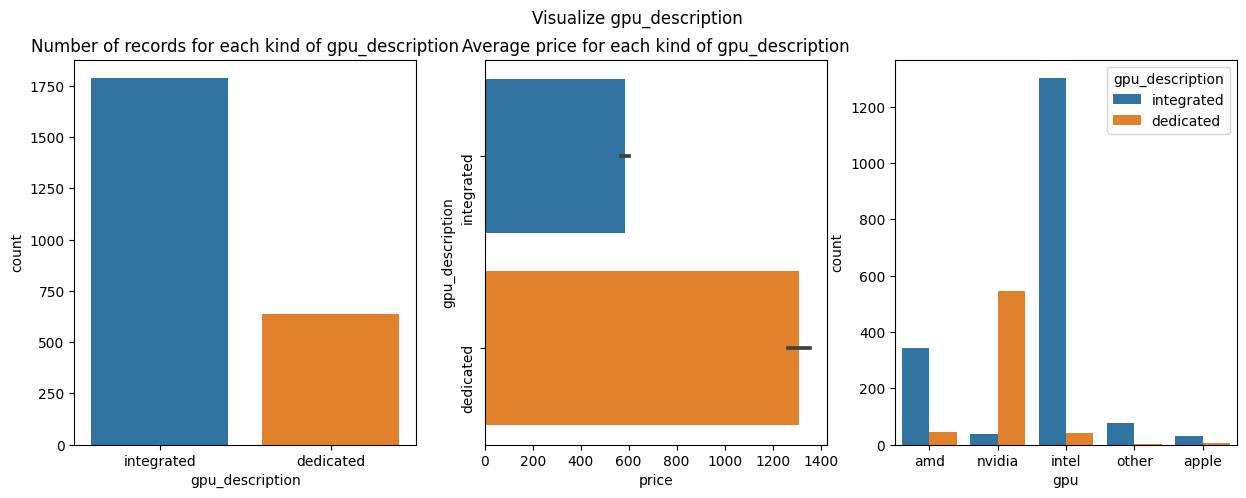

In [46]:
fig, axes = plt.subplots(1, 3,figsize=(15,5))
sns.countplot(data=data, x='gpu_description',ax=axes[0])
fig.suptitle("Visualize gpu_description")
axes[0].set_title("Number of records for each kind of gpu_description")
# axes[0].tick_params(labelrotation=90,axis='x')
sns.barplot(data=data, y='gpu_description',x='price',ax=axes[1],orient='h')
axes[1].set_title("Average price for each kind of gpu_description")
axes[1].tick_params(labelrotation=90,axis='y')
sns.countplot(data=data, x='gpu',hue='gpu_description',ax=axes[2])
plt.show()

In [47]:
#One-hot ecoding:
data= pd.get_dummies(data,dtype=int)
data

,screen_size,screen_resolution,cpu_speed,ram,memory,weight,price,ppi,brand_acer,brand_apple,...,gpu_description_integrated,OpSys_mac_os,OpSys_windows,color_black,color_blue,color_gold,color_grey,color_other,color_silver,color_white
0,15.6,2073600,4.1,8.0,128.0,3.92,292.49,141.211998,1,0,...,1,0,1,0,0,0,0,0,1,0
1,15.6,2073600,4.3,8.0,1024.0,3.92,669.99,141.211998,1,0,...,1,0,1,0,1,0,0,0,0,0
2,15.6,2073600,3.0,32.0,2048.0,5.51,1869.00,141.211998,1,0,...,0,0,1,1,0,0,0,0,0,0
3,17.3,2073600,2.5,32.0,1024.0,9.98,1159.00,127.335675,1,0,...,0,0,1,1,0,0,0,0,0,0
4,14.0,2073600,1.6,4.0,32.0,3.42,293.00,157.350512,1,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422,13.0,4096000,3.1,8.0,512.0,3.02,744.40,232.221074,0,1,...,1,1,0,0,0,0,1,0,0,0
2423,15.0,4096000,3.5,8.0,512.0,6.35,1439.95,201.258264,0,1,...,1,1,0,0,0,0,0,0,1,0
2424,13.0,4096000,2.4,8.0,512.0,3.00,578.69,232.221074,0,1,...,1,1,0,0,0,0,1,0,0,0
2425,11.6,1049088,2.7,4.0,128.0,1.10,209.99,135.094211,0,1,...,1,1,0,0,0,0,0,0,1,0


In [48]:
data.to_csv('data_final.csv')